Importing all important fratures

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
print("SetUp Completed !")

SetUp Completed !


# Studying the improted data using .info and .describe

In [2]:
data = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
data.columns = data.columns.str.strip()
display(data.isnull().head())
display(data.describe())


Country   Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0    False  False   False            False            False          False   
1    False  False   False            False            False          False   
2    False  False   False            False            False          False   
3    False  False   False            False            False          False   
4    False  False   False            False            False          False   

   Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0    False                   False        False    False  ...  False   
1    False                   False        False    False  ...  False   
2    False                   False        False    False  ...  False   
3    False                   False        False    False  ...  False   
4    False                   False        False    False  ...  False   

   Total expenditure  Diphtheria  HIV/AIDS    GDP  Population  \
0              False       False     False  False       False   
1              False       False     False  False       False   
2              False       False     False  False       False   
3              False       False     False  False       False   
4              False       False     False  False       False   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                 False               False                            False   
1                 False               False                            False   
2                 False               False                            False   
3                 False               False                            False   
4                 False               False                            False   

   Schooling  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 22 columns]

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

Checking the null values using .isnull()

In [3]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Checking the relation between data with the expected output

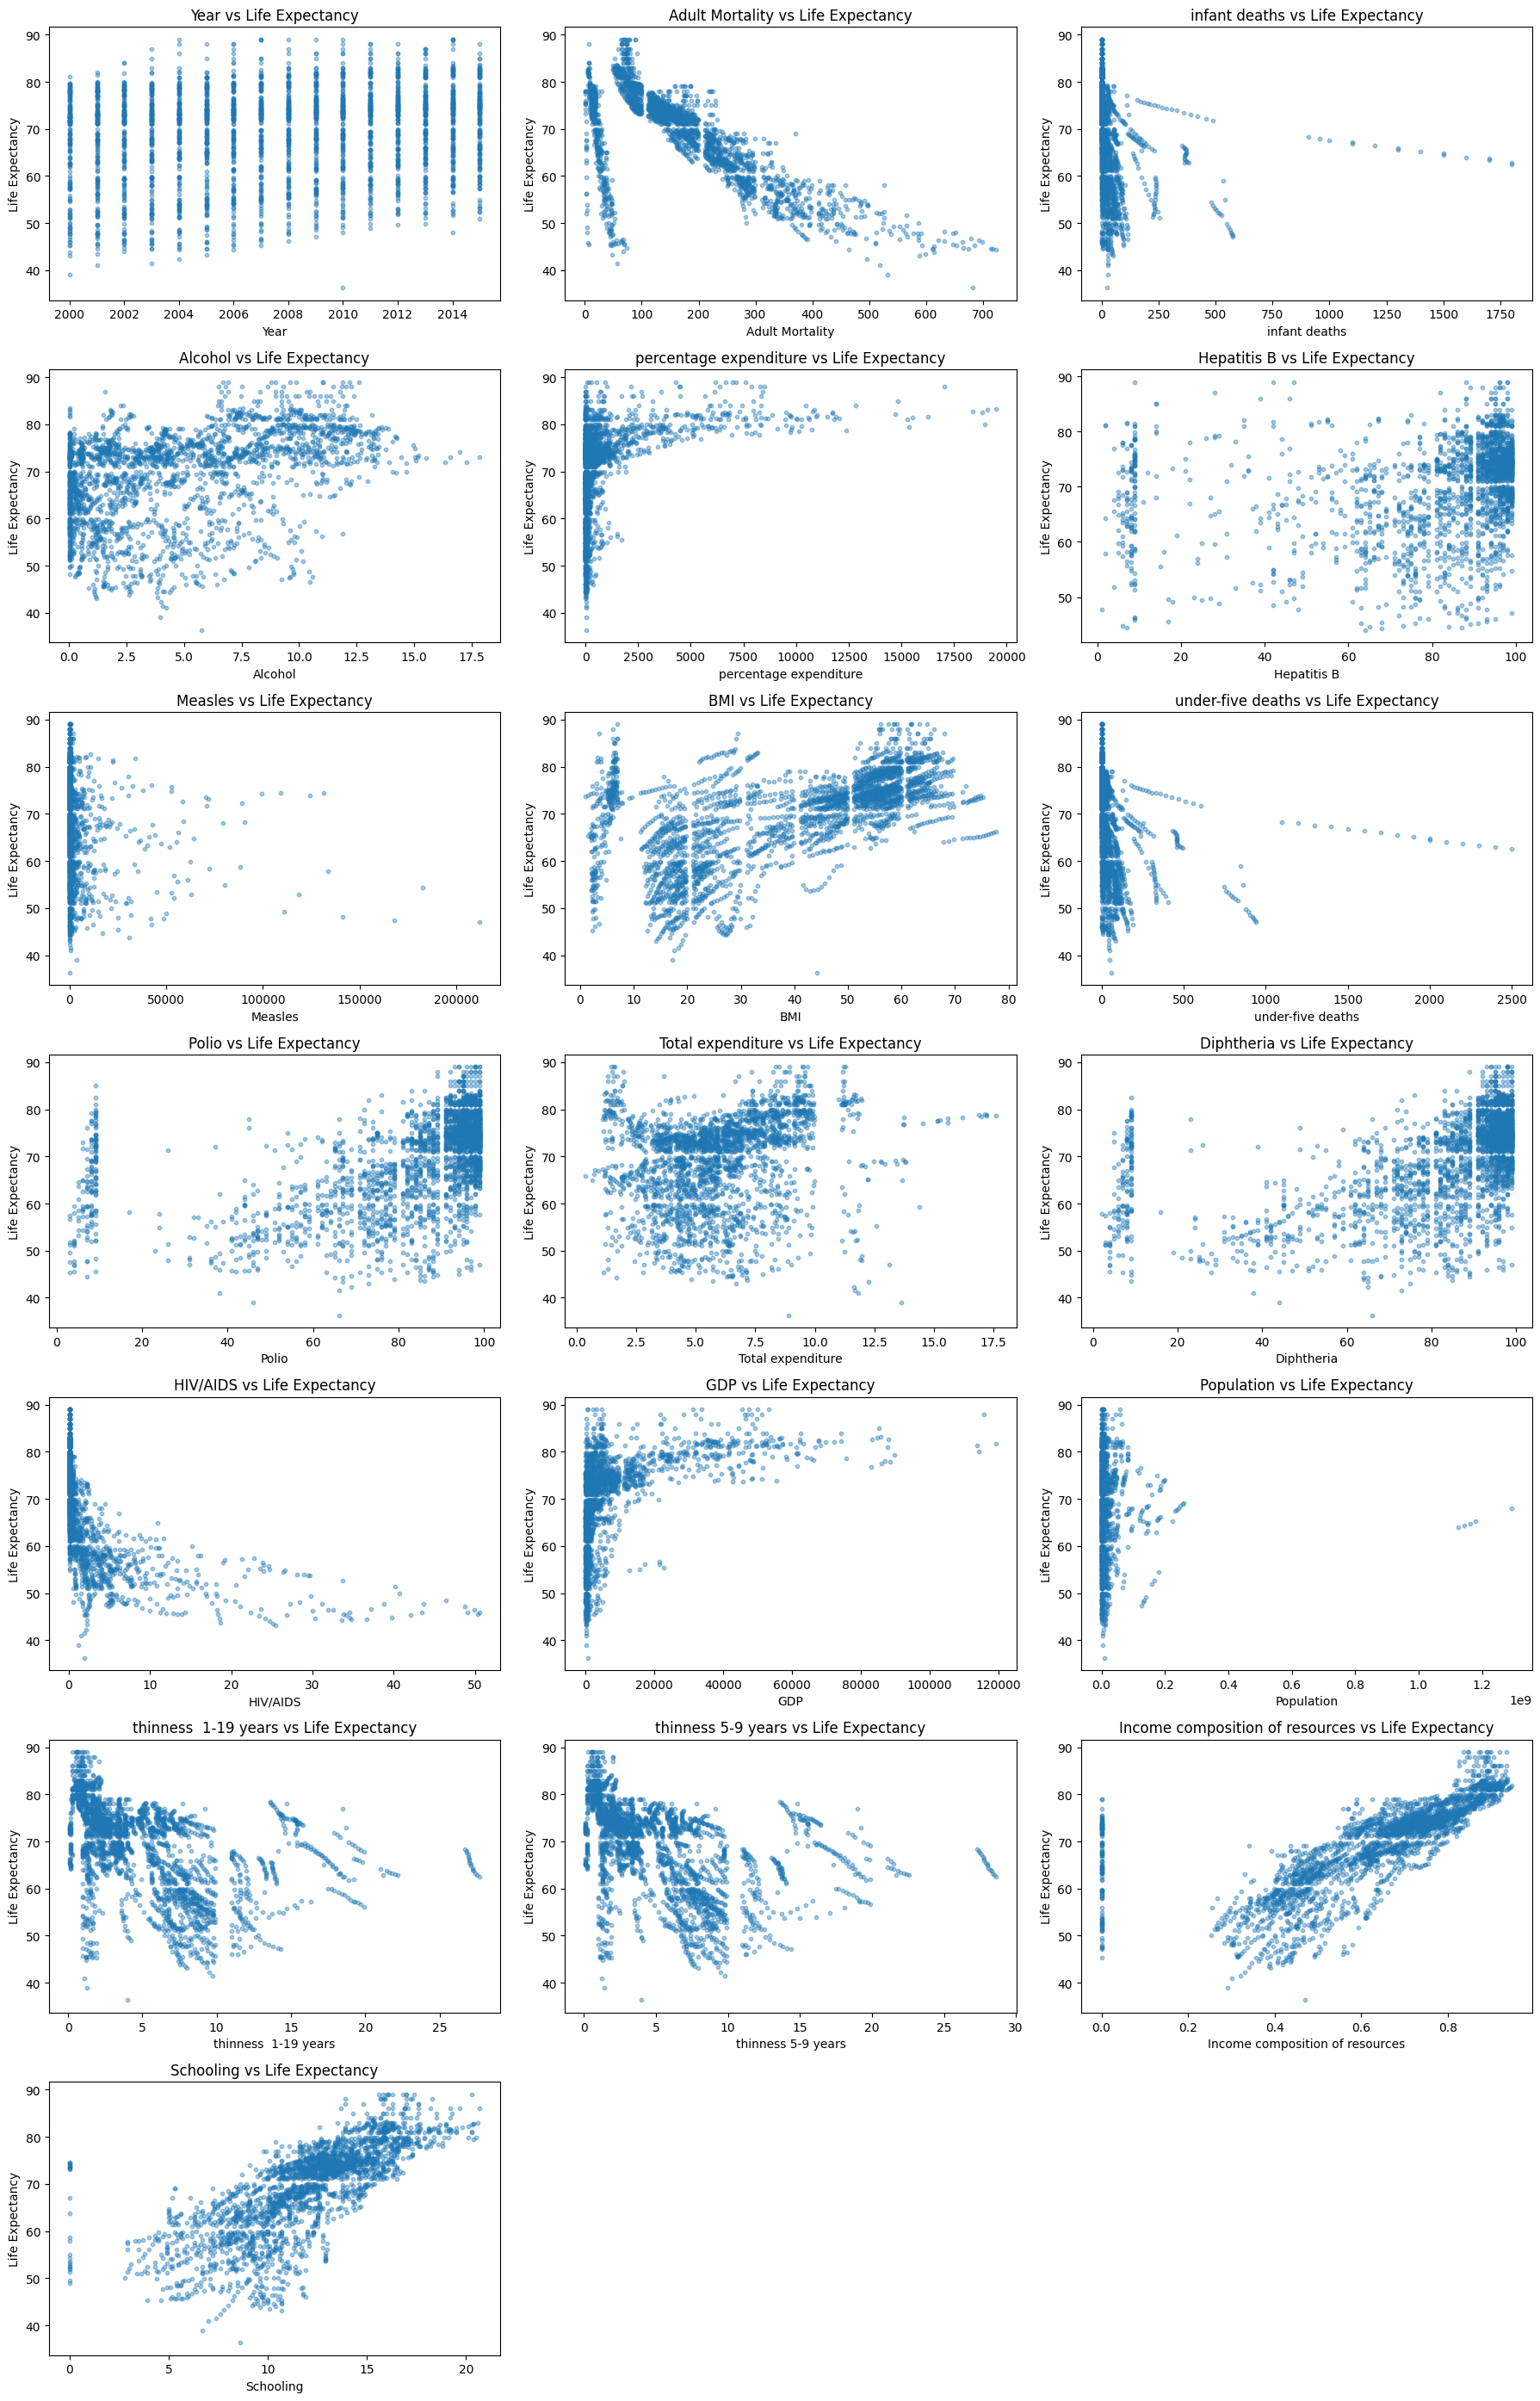

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Clean column names
data.columns = data.columns.str.strip()

y = data['Life expectancy']
X = data.drop(columns=['Life expectancy'])

# Select numeric columns
num_cols = X.select_dtypes(include='number').columns

# Grid size: 3 plots per row
n = len(num_cols)
rows = int(np.ceil(n / 3))

# Create figure
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(num_cols):
    axes[i].scatter(X[col], y, alpha=0.4, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Life Expectancy')
    axes[i].set_title(f'{col} vs Life Expectancy')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [5]:
x = data[['Alcohol','BMI','Polio','Total expenditure','Diphtheria','Income composition of resources','Schooling']]
x

Alcohol   BMI  Polio  Total expenditure  Diphtheria  \
0        0.01  19.1    6.0               8.16        65.0   
1        0.01  18.6   58.0               8.18        62.0   
2        0.01  18.1   62.0               8.13        64.0   
3        0.01  17.6   67.0               8.52        67.0   
4        0.01  17.2   68.0               7.87        68.0   
...       ...   ...    ...                ...         ...   
2933     4.36  27.1   67.0               7.13        65.0   
2934     4.06  26.7    7.0               6.52        68.0   
2935     4.43  26.3   73.0               6.53        71.0   
2936     1.72  25.9   76.0               6.16        75.0   
2937     1.68  25.5   78.0               7.10        78.0   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 7 columns]

In [6]:
y = data['Life expectancy']
y.isnull().sum()
y = y.fillna(y.mean())
display(y)
y.isnull().sum()

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

0

In [7]:
x.isnull().sum()
x = x.fillna(x.mean())
display(x)
x.isnull().sum()

Alcohol   BMI  Polio  Total expenditure  Diphtheria  \
0        0.01  19.1    6.0               8.16        65.0   
1        0.01  18.6   58.0               8.18        62.0   
2        0.01  18.1   62.0               8.13        64.0   
3        0.01  17.6   67.0               8.52        67.0   
4        0.01  17.2   68.0               7.87        68.0   
...       ...   ...    ...                ...         ...   
2933     4.36  27.1   67.0               7.13        65.0   
2934     4.06  26.7    7.0               6.52        68.0   
2935     4.43  26.3   73.0               6.53        71.0   
2936     1.72  25.9   76.0               6.16        75.0   
2937     1.68  25.5   78.0               7.10        78.0   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 7 columns]

Alcohol                            0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
Income composition of resources    0
Schooling                          0
dtype: int64

# MODEL 1
This model is made using the sklearn train test split method and using the linear regression.

In [8]:


# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100
)

# Create model
lin_reg = LinearRegression()

# Train model
lin_reg.fit(x_train, y_train)

# Predict
y_pred = lin_reg.predict(x_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.6530257076178134
MSE: 32.85048648141024
RMSE: 5.731534391540388


# MODEL 2
This model is made using a NN and for which we have used the MPLRegressor with 64 neurons and tanh as activation function bcoz it handles the non linear data much better as compared to the linear or relu.

In [9]:
net = MLPRegressor(hidden_layer_sizes=(64), activation='tanh', solver = 'adam', random_state = 42,max_iter = 1000) 
net

MLPRegressor(activation='tanh', hidden_layer_sizes=64, max_iter=1000,
             random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

net.fit(x,y)

MLPRegressor(activation='tanh', hidden_layer_sizes=64, max_iter=1000,
             random_state=42)

In [11]:
net.score(x,y)

0.7554464337267321

# MODEL 3
This model will provide us the good accuracy as compare to the previouse models and the main reason for it is the non- linear dataset.
- R² = 0.91 → this model explains 91% of the variance in life expectancy
- That’s excellent — especially with RMSE under 3 years


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Create model
rf = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=None,         # let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.91439337034326
MSE: 7.416554065422004
RMSE: 2.723335099730109


# MODEL 4
Tried to use the Gradient Boosting method but same the accuracy score decrease here also.

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Create model
gbr = GradientBoostingRegressor(
    n_estimators=300,      # number of boosting stages
    learning_rate=0.05,   # shrinkage rate
    max_depth=3,          # depth of individual trees
    random_state=42
)

# Train model
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8724577751532305
MSE: 11.04965596698737
RMSE: 3.324102279862545
